# Introduction

### Logistic regression is a classification algorithm used to assign observations to a discrete set of classes. Unlike linear regression which outputs continuous number values, logistic regression transforms its output using the logistic sigmoid function to return a probability value which can then be mapped to two or more discrete classes.

### In order to map predicted values to probabilities, we use the sigmoid function. The function maps any real value into another value between 0 and 1. In machine learning, we use sigmoid to map predictions to probabilities.

### Sigmoid Function: $f(x) = \frac{1}{1 + exp(-x)}$

In [12]:
# loading libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

from IPython.core.display import display, HTML
import warnings

sns.set_style("ticks")
mpl.rcParams["axes.linewidth"] = 2
mpl.rcParams["lines.linewidth"] = 2
warnings.filterwarnings("ignore")
display(HTML("<style>.container { width:95% !important; }</style>"))


def sigmoid(x):
    """
    Returns sigmoid(x)
    """
    return 1.0/(1 + np.exp(-x))

def plot_sigmoid(x):
    """
    Plots sigmoid(x)
    """
    fig, ax = plt.subplots(figsize=(5,5))
    ax.plot(x, sigmoid(x), lw=2, c="navy", label="Sigmoid")
    ax.axhline(0.5, lw=2, ls="--", c="red", label="Decision Bound")
    ax.set(title="Sigmoid Function",
           xlabel="x",
           ylabel="Sigmoid(x)")
    ax.grid(True)
    ax.legend(loc=0)
    plt.plot()

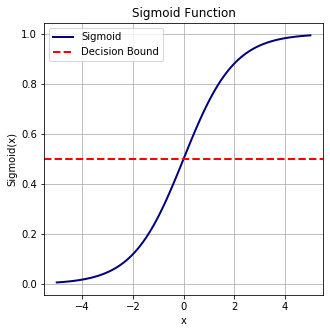

In [11]:
# define x to plot sigmoid(x)
x = np.linspace(-5, 5, 100)
plot_sigmoid(x)

### The main algorithm to develop Logistic Regression is based on updating weights using Gradient Descent approach iteratively.
- Define linear model: $z = wx + b$
- Define prediction: $\hat{y} = sigmoid(z) = sigmoid(wx + b) = \frac{1}{1 + \exp({-(wx+b)})}$
- Update weights: $w = w - lr \times dw$ where $dw = \frac{1}{N} \Sigma_{i=1}^{N}(2x_i(\hat{y_i} - y_i))$
- Update bias $b = b - lr \times db$ where $db = \frac{1}{N} \Sigma_{i=1}^{N}(\hat{y_i} - y_i)$

In [1]:
class LogisticRegression:
    """
    Logistic Regression based on Gradient Descent
    z = wx + b
    y_hat = sigmoid(z) = sigmoid(wx + b) = 1/(1 + exp[-(wx+b)])
    update rules: w = w - lr * dw
                  b = b - lr * db
    where dw = 1/N sum(2x(y_hat - y))
          db = 1/N sum(2(y_hat - y))
    Parameters
    ----------
    lr: float, optional (default=0.001)
        Learning rate used of updating weights/bias
    n_iters: int, optional (default=1000)
        Maximum number of iterations to update weights/bias
    weights: numpy.array, optional (default=None)
        Weights array of shape (n_features, ) where
        will be initialized as zeros
    bias: float, optional (default=None)
        Bias value where will be initialized as zero
    """

    def __init__(self, learning_rate=0.001, n_iters=1000, weights=None, bias=None):
        self.learning_rate = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X_train, y_train):
        """
        Train model using iterative gradient descent
        Parameters
        ----------
        X_train: numpy.array
            Training feature matrix
        y_train: 1D numpy.array or list
            Training binary class labels [0, 1]
        """
        # unpack the shape of X_train
        n_samples, n_features = X_train.shape

        # initialize weights and bias with zeros
        self.weights = np.zeros(n_features)
        self.bias = 0.0

        # main loop
        # self.loss = []
        for _ in range(self.n_iters):
            z = np.dot(X_train, self.weights) + self.bias
            y_hat = self._sigmoid(z)

            # update weights + bias
            dw = (1.0 / n_samples) * 2 * np.dot(X_train.T, (y_hat - y_train))
            db = (1.0 / n_samples) * 2 * np.sum(y_hat - y_train)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

        return None

    def predict_proba(self, X_test):
        """
        Prediction probability of the test samples
        Parameters
        ----------
        X_test: numpy.array
            Testing feature matrix
        """
        z = np.dot(X_test, self.weights) + self.bias
        y_pred_proba = self._sigmoid(z)

        return y_pred_proba

    def predict(self, X_test, threshold=0.5):
        """
        Prediction class of the test samples
        Parameters
        ----------
        X_test: numpy.array
            Testing feature matrix
        threshold: float, optional (default=0.5)
            Threshold to define predicted classes
        """
        y_pred_proba = self.predict_proba(X_test)
        y_pred = [1 if x >= 0.5 else 0 for x in y_pred_proba]

        return y_pred

    def plot_decision_boundary(self, X_test, y_test, threshold=0.5, figsize=(8, 6)):
        """
        Plot the decision boundary
        Parameters
        ----------
        X_test: numpy.array
            Testing feature matrix
        y_test: 1D numpy.array or list
            Testing targets
        threshold: float, optional (default=0.5)
            Threshold to define predicted classes
        figsize: tuple, optional (default=(8,6))
            Figure size
        """
        # calc pred_proba
        y_pred_proba = self.predict_proba(X_test)

        # define positive and negative classes
        pos_class = []
        neg_class = []
        for i in range(len(y_pred_proba)):
            if y_pred_proba[i] >= threshold and y_test[i] == 1:
                pos_class.append(y_pred_proba[i])
            else:
                neg_class.append(y_pred_proba[i])

        # plotting
        fig, ax = plt.subplots(figsize=figsize)
        ax.scatter(
            range(len(pos_class)),
            pos_class,
            s=25,
            color="navy",
            marker="o",
            label="Positive Class",
        )
        ax.scatter(
            range(len(neg_class)),
            neg_class,
            s=25,
            color="red",
            marker="s",
            label="Negative Class",
        )
        ax.axhline(
            threshold,
            lw=2,
            ls="--",
            color="black",
            label=f"Decision Bound = {threshold}",
        )
        ax.set_title("Decision Boundary")
        ax.set_xlabel("# of Samples", fontsize=12)
        ax.set_ylabel("Predicted Probability", fontsize=12)
        ax.tick_params(axis="both", which="major", labelsize=12)
        ax.legend(bbox_to_anchor=(1.2, 0.5), loc="center", ncol=1, framealpha=0.0)
        plt.show()

    def _sigmoid(self, z):
        """
        Sigmoid Function
        f(z) = 1/(1 + exp(-z))
        """

        return 1.0 / (1 + np.exp(-z))

### This is part of the [**ML-Algs**](https://github.com/amirhessam88/ml-algs) library which can be downloaded via PIP or from Git.

In [3]:
# you can simply do
!pip install mlalgs

In [4]:
# or cloning the project directly from GitHub
!git clone https://github.com/amirhessam88/ml-algs.git

# change directory to the project
%cd ml-algs

# installing requirements
!pip install -r requirements.txt

In [4]:
# loading libraries
from mlalgs.logistic_regression import LogisticRegression
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### Sample breast cancer data for binary classification task. I have used stratifed train/test splits where test size is the 20\% of the data.

In [5]:
# loading data
data = datasets.load_breast_cancer()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=1367,
                                                    stratify=y)

### Now, train the model using our algorithm.

In [6]:
# define model
clf = LogisticRegression()
# train model
clf.fit(X_train, y_train)
# predicted class
y_pred = clf.predict(X_test)
# predicted proba
y_pred_proba = clf.predict_proba(X_test)

In [7]:
# accuracy
accuracy_score(y_test, y_pred)

0.9298245614035088

### We can also plot the decision boundary and the predicted probabilities in each class.

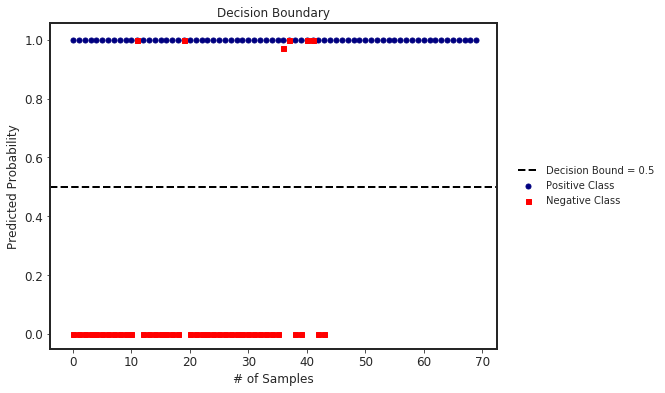

In [8]:
clf.plot_decision_boundary(X_test, y_test)

### We can also calculate all the binary classification metrics using [**SlickML**](https://github.com/slickml/slick-ml) library.

In [ ]:
# simply install slickml via pip
!pip install slickml

In [10]:
# loading BinaryClassificationMetrics
from slickml.metrics import BinaryClassificationMetrics

In [11]:
# initialize the metric object
clf_metrics = BinaryClassificationMetrics(y_test, y_pred_proba)

,Accuracy,Balanced Accuracy,ROC AUC,PR AUC,Precision,Recall,Average Precision,F-1 Score,F-2 Score,F-0.50 Score,Threat Score,TP,TN,FP,FN
Threshold = 0.500 | Average = Binary,0.930000,0.915000,0.946000,0.969000,0.921000,0.972000,0.943000,0.946000,0.962000,0.931000,0.897000,70,36,6,2


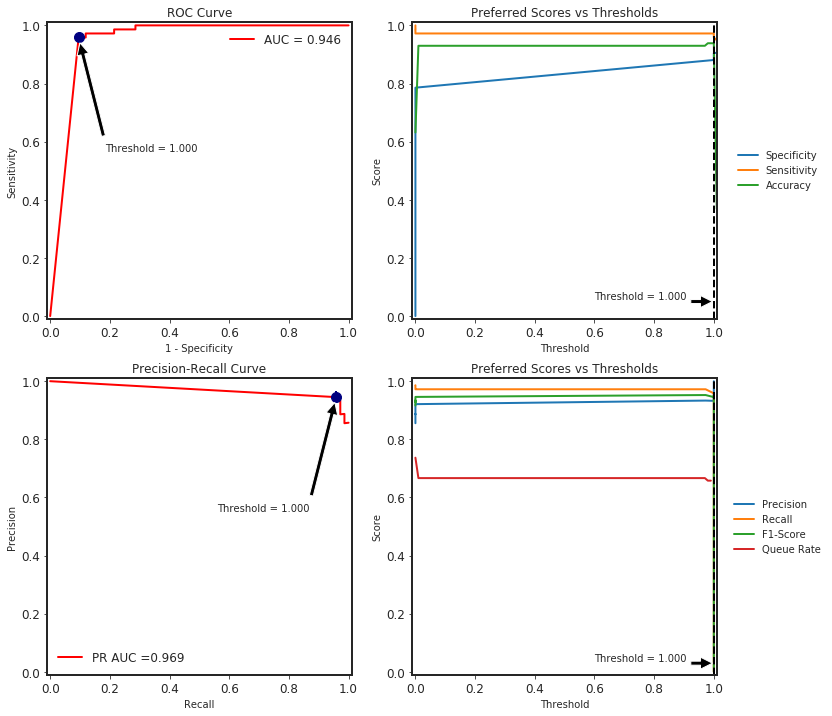

In [12]:
# plot roc, precision-recall with different thresholds calculations
clf_metrics.plot()